In [1]:
from google.colab import files 
  
uploaded = files.upload()

Saving noisy_ECG_Signal.csv - noisy_ECG_Signal.csv.csv to noisy_ECG_Signal.csv - noisy_ECG_Signal.csv.csv


In [2]:
### Import required packages
import csv
import math
import io 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
# Helps to obtain the FFT
import scipy.fftpack    
# Various operations on signals (waveforms)
import scipy.signal as signal

In [4]:
###Obtain ECG sample from uploaded csv file using pandas###                                                   
dataset = pd.read_csv(io.BytesIO(uploaded['noisy_ECG_Signal.csv - noisy_ECG_Signal.csv.csv']))          

#Read the sampled values from the dataset
y = [e for e in dataset.hart]
	
#Number of samplepoints
N = len(y)

#sample spacing
samp_freq = 300         #Sampling frequency
T = 1.0 / samp_freq     #Sample interval

#Compute sample points along time-axis 
x = np.linspace(0.0, N*T, N)

#Compute FFT of the input signal
yf = fft(y,N)##Here input should be y, not the dataset

#Compute frequency x-axis
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


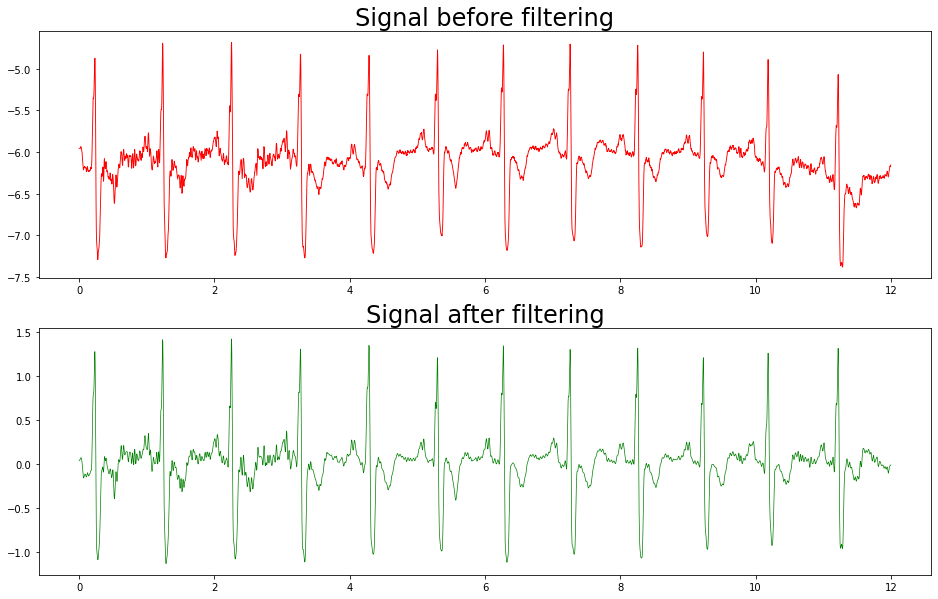

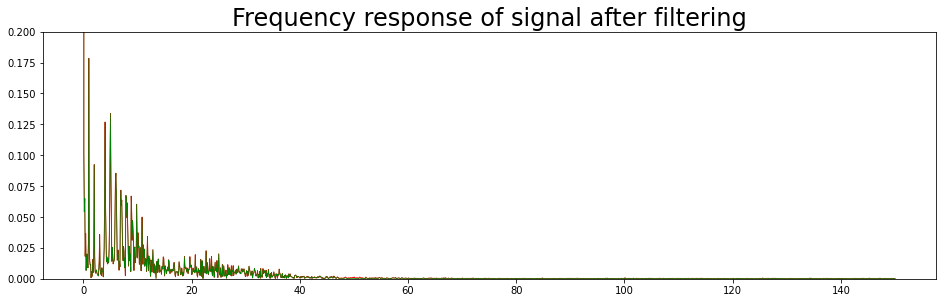

In [43]:
##Plotting of the results


##Declare plots for time-domain and frequency-domain plots##
fig_td = plt.figure()
fig_td.set_size_inches((16,10))
fig_td.canvas.set_window_title('Time domain signals')

fig_fd = plt.figure()
fig_fd.set_size_inches((16,10))
fig_fd.canvas.set_window_title('Frequency domain signals')


#Plot non-filtered inputs
ax1 = fig_td.add_subplot(211)
ax1.set_title('Signal before filtering',fontsize=24)
ax1.plot(x,y, color='r', linewidth=0.9)

ax2 = fig_fd.add_subplot(212)
ax2.set_title('Frequency response of signal before filtering', fontsize=24)
ax2.plot(xf, 2.0/N * np.abs(yf[:N//2]), color='r', linewidth=0.9, label='Input raw signal')
ax2.set_ylim([0 , 0.2])



notch_freq =50         ##Frequency to be removed from signal (Hz)
quality_factor =20      ## Quality factor



##Design a notch filter using signal.iirnotch
b_notch, a_notch =signal.iirnotch(notch_freq,quality_factor,fs=samp_freq) ### START CODE HERE ### (≈ 1 line of code) 


#Compute filtered signal using signal.filtfilt
tempf =signal.filtfilt(b_notch,a_notch,y)

##Compute fft of filtered signal
yff = fft(tempf)### START CODE HERE ### (≈ 1 line of code)  ##Here input is not yf, but tempf, i.e., output of filter

##Baseline wandar remobal by bandpass filter

cutoff=0.05


nyq = 0.5 * samp_freq
lowcut=0.75
highcut=40   #Take highcut 40 Hz
low = lowcut / nyq
high = highcut / nyq
order=4
b, a = signal.butter(order, [low, high], btype='bandpass')


##Filter the signal using a band pass filter
y_filt =signal.filtfilt(b,a,tempf)      ##Here the input signal is tempf, i.e., output of notch filter


##Perform FFT of final output signal
### START CODE HERE ### (≈ 1 line of code) 
Outf =fft(y_filt)
#Plot filtered outputs
ax2 = fig_td.add_subplot(212)
ax2.set_title('Signal after filtering', fontsize=24)
ax2.plot(x,y_filt, color='g', linewidth=0.7);

ax4 = fig_fd.add_subplot(212)
ax4.plot(xf, 2.0/N * np.abs(yff[:N//2]), color='g', linewidth=0.7)
ax4.set_title('Frequency response of signal after filtering', fontsize=24) 
ax4.set_ylim([0 , 0.2])
plt.show()                